In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from IPython.display import display
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel('/Users/tema.fazly/Downloads/Исходные данные.xlsx', index_col = 'Наименование региона')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Наименование региона,,,,,,,,,
Алтайский край,364.2,3.361268,3.6,8.2,39270,688.3,1260.8,7.3,5.0
Амурская область,312.4,3.414995,3.6,9.1,65864,807.7,930.5,9.9,6.3
Архангельская область без автономного округа,341.4,3.030572,4.8,7.9,64417,694.3,1219.1,7.3,5.1
Астраханская область,300.4,1.775376,6.8,10.1,47780,579.5,782.3,6.1,5.7
Белгородская область,336.3,1.204854,3.0,7.1,47638,556.3,801.7,7.4,4.3
...,...,...,...,...,...,...,...,...,...
Чеченская Республика,200.4,0.102369,10.4,20.8,33700,220.7,450.1,2.9,6.0
Чувашская Республика — Чувашия,246.6,1.914228,4.2,8.4,41527,663.6,934.9,5.3,3.8
Чукотский автономный округ,117.3,5.075930,0.6,10.6,140602,957.7,1350.9,8.8,4.5


In [3]:
scaler = preprocessing.StandardScaler()
df.loc[:, 'X1':'X9'] = scaler.fit_transform(df.loc[:, 'X1':'X9'])
df

/var/folders/lc/98j3g_gd3lzd4ft6zg7wp6m40000gn/T/ipykernel_2966/2589946916.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.7283276   0.4237199   0.36103611 -0.35967587 -0.36582728 -0.66187498
 -0.45077746 -0.51294142 -0.10842086 -0.42478557  3.01311928  0.03787019
  0.14426369 -0.8535219   0.37047983 -0.90242999 -0.37834671 -0.09412532
  2.05583772 -0.89324618  0.06802079 -0.66061871 -0.68622073 -0.25258925
  0.67774737 -0.61907499 -0.43422929  0.17003899 -0.40598476  2.83221568
  0.63343118  1.35345004  2.20351502 -0.33420381 -0.46940499 -0.10075326
 -0.39554468 -0.54335193 -0.66018551 -0.64008511 -0.12340953  0.32516729
 -0.74149683 -0.68669724 -0.52455113 -0.28689855 -0.11210305 -0.90975104
 -1.00856356 -0.85486481  0.0162536   0.55047371 -0.61067095 -0.66581709
 -0.71671788  1.76074306 -0.8543883  -0.16499656 -0.18630991 -0.06761359
 -0.49019851 -0.44674872 -0.31228397  1.32329944 -0.57034019  2.0187559

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Наименование региона,,,,,,,,,
Алтайский край,0.495986,0.928276,-0.374020,-0.350191,-0.728328,0.352244,1.601546,0.157795,0.165648
Амурская область,-0.200432,0.972524,-0.374020,0.028729,0.423720,1.226522,0.075644,1.858897,1.785479
Архангельская область без автономного округа,0.189455,0.655924,-0.015804,-0.476497,0.361036,0.396177,1.408903,0.157795,0.290250
Астраханская область,-0.361764,-0.377817,0.581224,0.449750,-0.359676,-0.444418,-0.609002,-0.627330,1.037864
Белгородская область,0.120888,-0.847682,-0.553129,-0.813314,-0.365827,-0.614295,-0.519379,0.223222,-0.706569
...,...,...,...,...,...,...,...,...,...
Чеченская Республика,-1.706199,-1.755656,1.655874,4.954679,-0.969619,-3.071645,-2.143682,-2.720994,1.411671
Чувашская Республика — Чувашия,-1.085070,-0.263463,-0.194912,-0.265986,-0.630555,0.171384,0.095971,-1.150746,-1.329580
Чукотский автономный округ,-2.823425,2.340420,-1.269562,0.660261,3.661357,2.324860,2.017786,1.139200,-0.457364


In [4]:
def plot_dendrogram(data, method=None, threshold=None, figsize=(20, 12), 
                    leaf_font_size=10, threshold_color='red', threshold_style='--'):
    
    Z = linkage(data, method=method, optimal_ordering=True)
    
    plt.figure(figsize=figsize)
    dendrogram(Z, labels=data.index, leaf_font_size=leaf_font_size, color_threshold=threshold)
    
    
    plt.axhline(y=threshold, color=threshold_color, linestyle=threshold_style)
    plt.text(0, threshold + 0.5, f'Порог = {threshold}', color=threshold_color, fontsize=16, ha='left')

    plt.title(f'{method.capitalize()} метод')
    plt.xlabel('Объекты')
    plt.ylabel('Расстояние')
    plt.show()

In [5]:
def cluster_data(data, method=None, n_clusters=None, threshold=None):

    if method != 'k-means':
        Z = linkage(data, method=method, optimal_ordering=True)

        if threshold is not None:
            cluster_labels = fcluster(Z, t=threshold, criterion='distance')
        elif n_clusters is not None:
            cluster_labels = fcluster(Z, t=n_clusters, criterion='maxclust')
        else:
            raise ValueError("Укажите либо threshold, либо n_clusters.")

    elif method == 'k-means':
        if n_clusters is None:
            raise ValueError(
                "Для метода k-means необходимо задать n_clusters.")
        clustering_model = KMeans(n_clusters=n_clusters)
        cluster_labels = clustering_model.fit_predict(data)

    return cluster_labels

In [6]:
def compute_cluster_means(df, cluster_column, feature_columns):

    cluster_means = df.groupby(cluster_column)[feature_columns].mean().reset_index()
    cluster_means['Кластер'] = [f'Кластер {i}' for i in range(1, len(cluster_means) + 1)]
    cluster_means = cluster_means[['Кластер'] + feature_columns]
    display(cluster_means)
    
    return cluster_means

In [7]:
def plot_clusters(df):

    plt.figure(figsize=(8, 4))

    for index, row in df.iterrows():
        cluster_name = row['Кластер']
        plt.plot(row.index[1:], row.values[1:], marker='o', label=cluster_name)
    
    plt.title('График значений кластеров')
    plt.xlabel('Признаки')
    plt.ylabel('Значения')
    plt.grid()
    plt.legend(loc='upper right', fontsize=8)
    plt.tight_layout()

    plt.show()

In [8]:
def clusters_values(df, method):
    clusters = {}

    for cluster, group in df.groupby(method):
        clusters[cluster] = group.index.tolist()

    for cluster, indices in clusters.items():
        print(f"Кластер {cluster}: {indices}")

In [9]:
df_new = df.loc[:, 'X1':'X9']
df_new

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Наименование региона,,,,,,,,,
Алтайский край,0.495986,0.928276,-0.374020,-0.350191,-0.728328,0.352244,1.601546,0.157795,0.165648
Амурская область,-0.200432,0.972524,-0.374020,0.028729,0.423720,1.226522,0.075644,1.858897,1.785479
Архангельская область без автономного округа,0.189455,0.655924,-0.015804,-0.476497,0.361036,0.396177,1.408903,0.157795,0.290250
Астраханская область,-0.361764,-0.377817,0.581224,0.449750,-0.359676,-0.444418,-0.609002,-0.627330,1.037864
Белгородская область,0.120888,-0.847682,-0.553129,-0.813314,-0.365827,-0.614295,-0.519379,0.223222,-0.706569
...,...,...,...,...,...,...,...,...,...
Чеченская Республика,-1.706199,-1.755656,1.655874,4.954679,-0.969619,-3.071645,-2.143682,-2.720994,1.411671
Чувашская Республика — Чувашия,-1.085070,-0.263463,-0.194912,-0.265986,-0.630555,0.171384,0.095971,-1.150746,-1.329580
Чукотский автономный округ,-2.823425,2.340420,-1.269562,0.660261,3.661357,2.324860,2.017786,1.139200,-0.457364


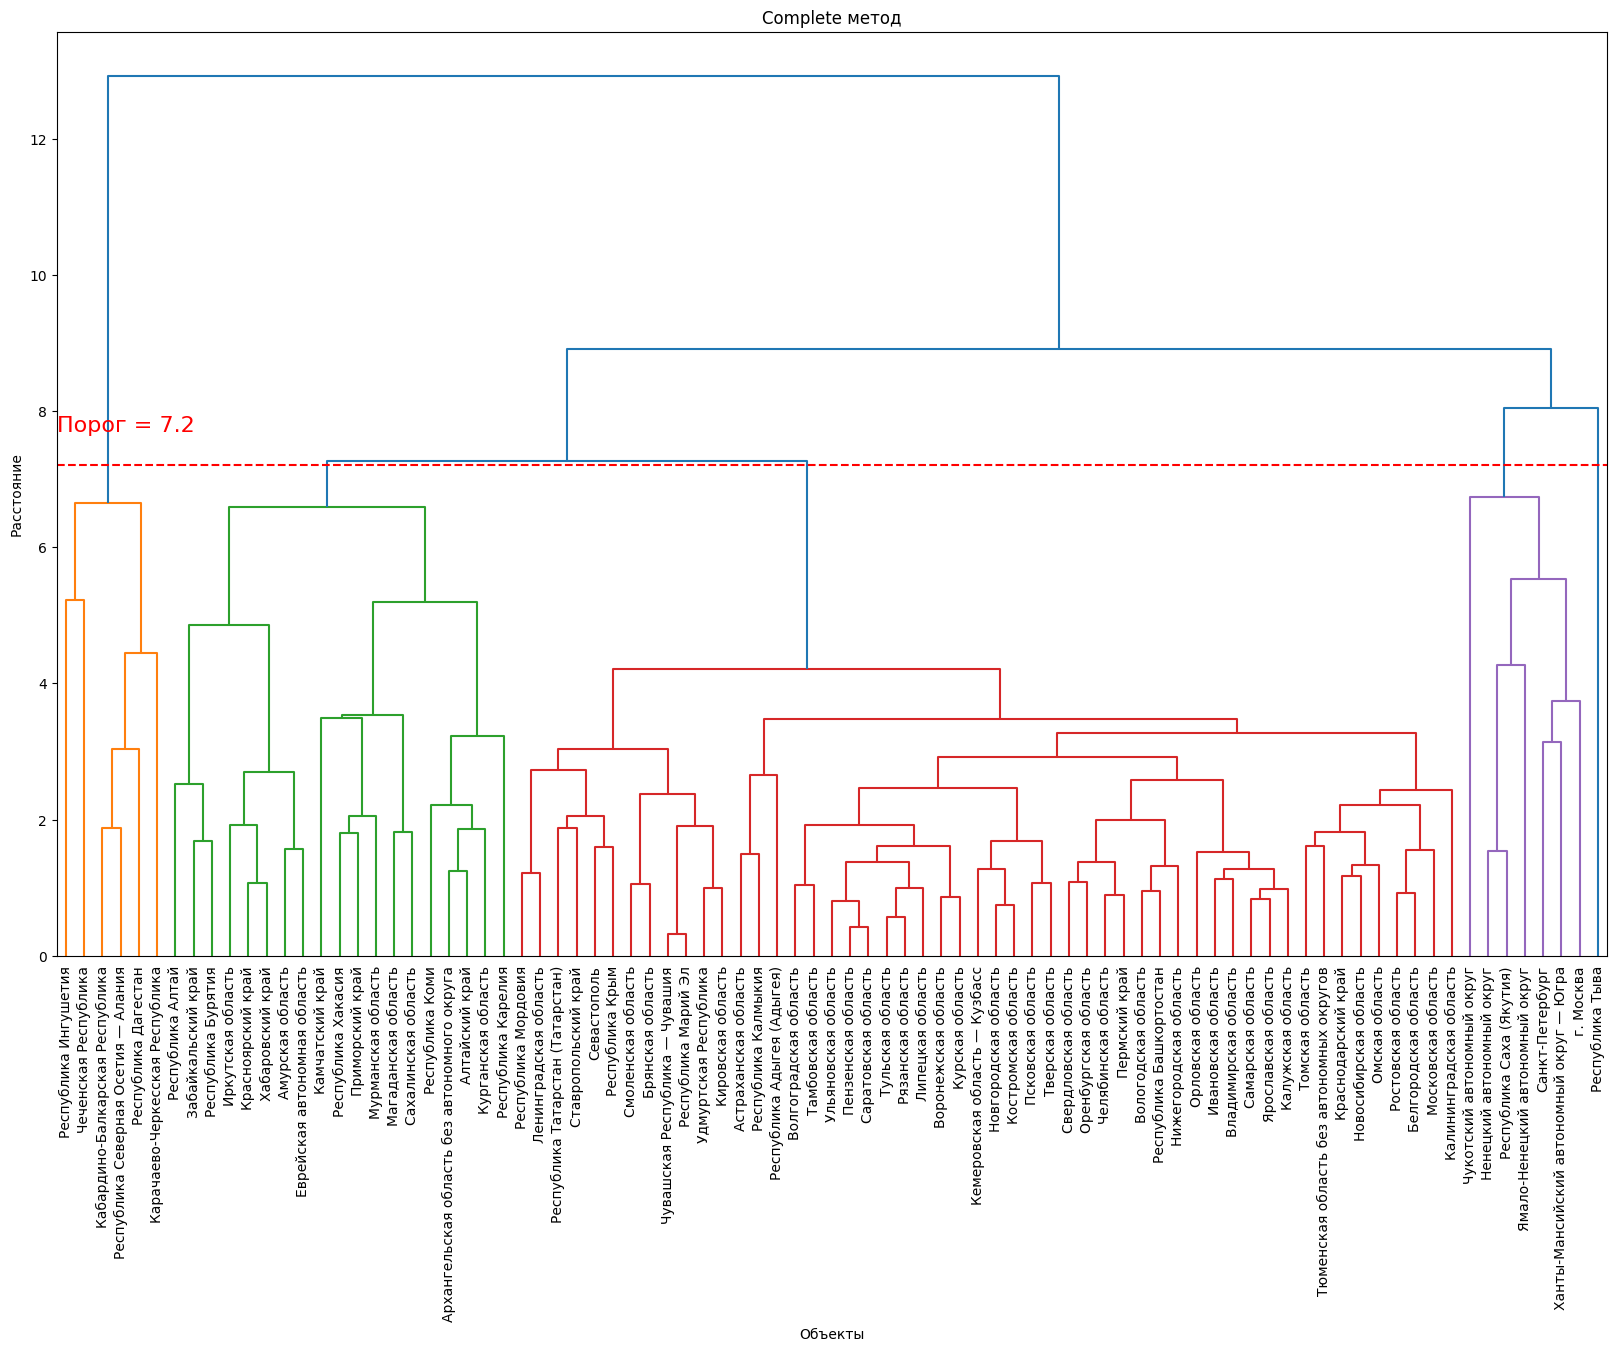

,Кластер,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,Кластер 1,-1.275308,-1.436788,2.327530,1.874206,-0.923000,-2.478176,-1.293340,-2.208483,1.390904
1,Кластер 2,0.500727,0.993981,0.120884,0.206001,0.502145,0.653112,0.439121,0.949806,1.005074
2,Кластер 3,0.112072,-0.296634,-0.297096,-0.470830,-0.400829,0.123156,-0.181498,-0.173115,-0.440591
3,Кластер 4,-0.791407,0.301619,-0.433723,0.810625,2.432380,-0.615027,1.389500,0.578397,-0.368362
4,Кластер 5,-2.149863,3.048716,2.223050,3.649513,-0.186310,0.361030,-0.871866,0.157795,-1.952592


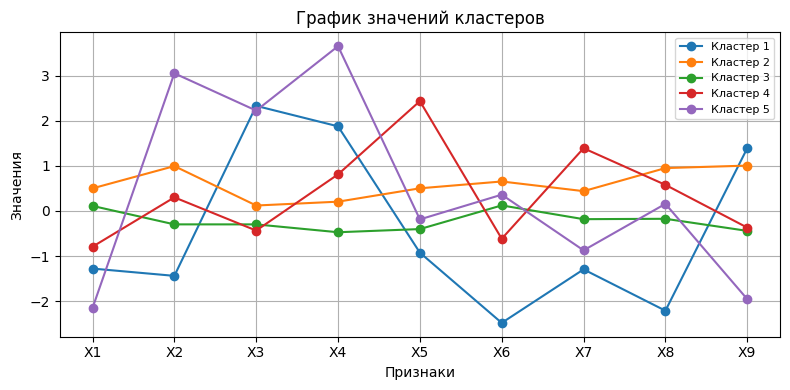

Кластер 1: ['Кабардино-Балкарская Республика', 'Карачаево-Черкесская Республика', 'Республика Дагестан', 'Республика Ингушетия', 'Республика Северная Осетия — Алания', 'Чеченская Республика']
Кластер 2: ['Алтайский край', 'Амурская область', 'Архангельская область без автономного округа', 'Еврейская автономная область', 'Забайкальский край', 'Иркутская область', 'Камчатский край', 'Красноярский край', 'Курганская область', 'Магаданская область', 'Мурманская область', 'Приморский край', 'Республика Алтай', 'Республика Бурятия', 'Республика Карелия', 'Республика Коми', 'Республика Хакасия', 'Сахалинская область', 'Хабаровский край']
Кластер 3: ['Астраханская область', 'Белгородская область', 'Брянская область', 'Владимирская область', 'Волгоградская область', 'Вологодская область', 'Воронежская область', 'Ивановская область', 'Калининградская область', 'Калужская область', 'Кемеровская область — Кузбасс', 'Кировская область', 'Костромская область', 'Краснодарский край', 'Курская область'

,X1,X2,X3,X4,X5,X6,X7,X8,X9,complete
Наименование региона,,,,,,,,,,
Алтайский край,0.495986,0.928276,-0.374020,-0.350191,-0.728328,0.352244,1.601546,0.157795,0.165648,2
Амурская область,-0.200432,0.972524,-0.374020,0.028729,0.423720,1.226522,0.075644,1.858897,1.785479,2
Архангельская область без автономного округа,0.189455,0.655924,-0.015804,-0.476497,0.361036,0.396177,1.408903,0.157795,0.290250,2
Астраханская область,-0.361764,-0.377817,0.581224,0.449750,-0.359676,-0.444418,-0.609002,-0.627330,1.037864,3
Белгородская область,0.120888,-0.847682,-0.553129,-0.813314,-0.365827,-0.614295,-0.519379,0.223222,-0.706569,3
...,...,...,...,...,...,...,...,...,...,...
Чеченская Республика,-1.706199,-1.755656,1.655874,4.954679,-0.969619,-3.071645,-2.143682,-2.720994,1.411671,1
Чувашская Республика — Чувашия,-1.085070,-0.263463,-0.194912,-0.265986,-0.630555,0.171384,0.095971,-1.150746,-1.329580,3
Чукотский автономный округ,-2.823425,2.340420,-1.269562,0.660261,3.661357,2.324860,2.017786,1.139200,-0.457364,4


In [10]:
plot_weighted = plot_dendrogram(df, method='complete', threshold=7.2)
df_new['complete'] = cluster_data(df, n_clusters=5, method='complete')
data_mean_weighted = compute_cluster_means(df_new, 'complete', ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'])
plot_clusters(data_mean_weighted)
result_weighted = clusters_values(df_new, 'complete')

df_new

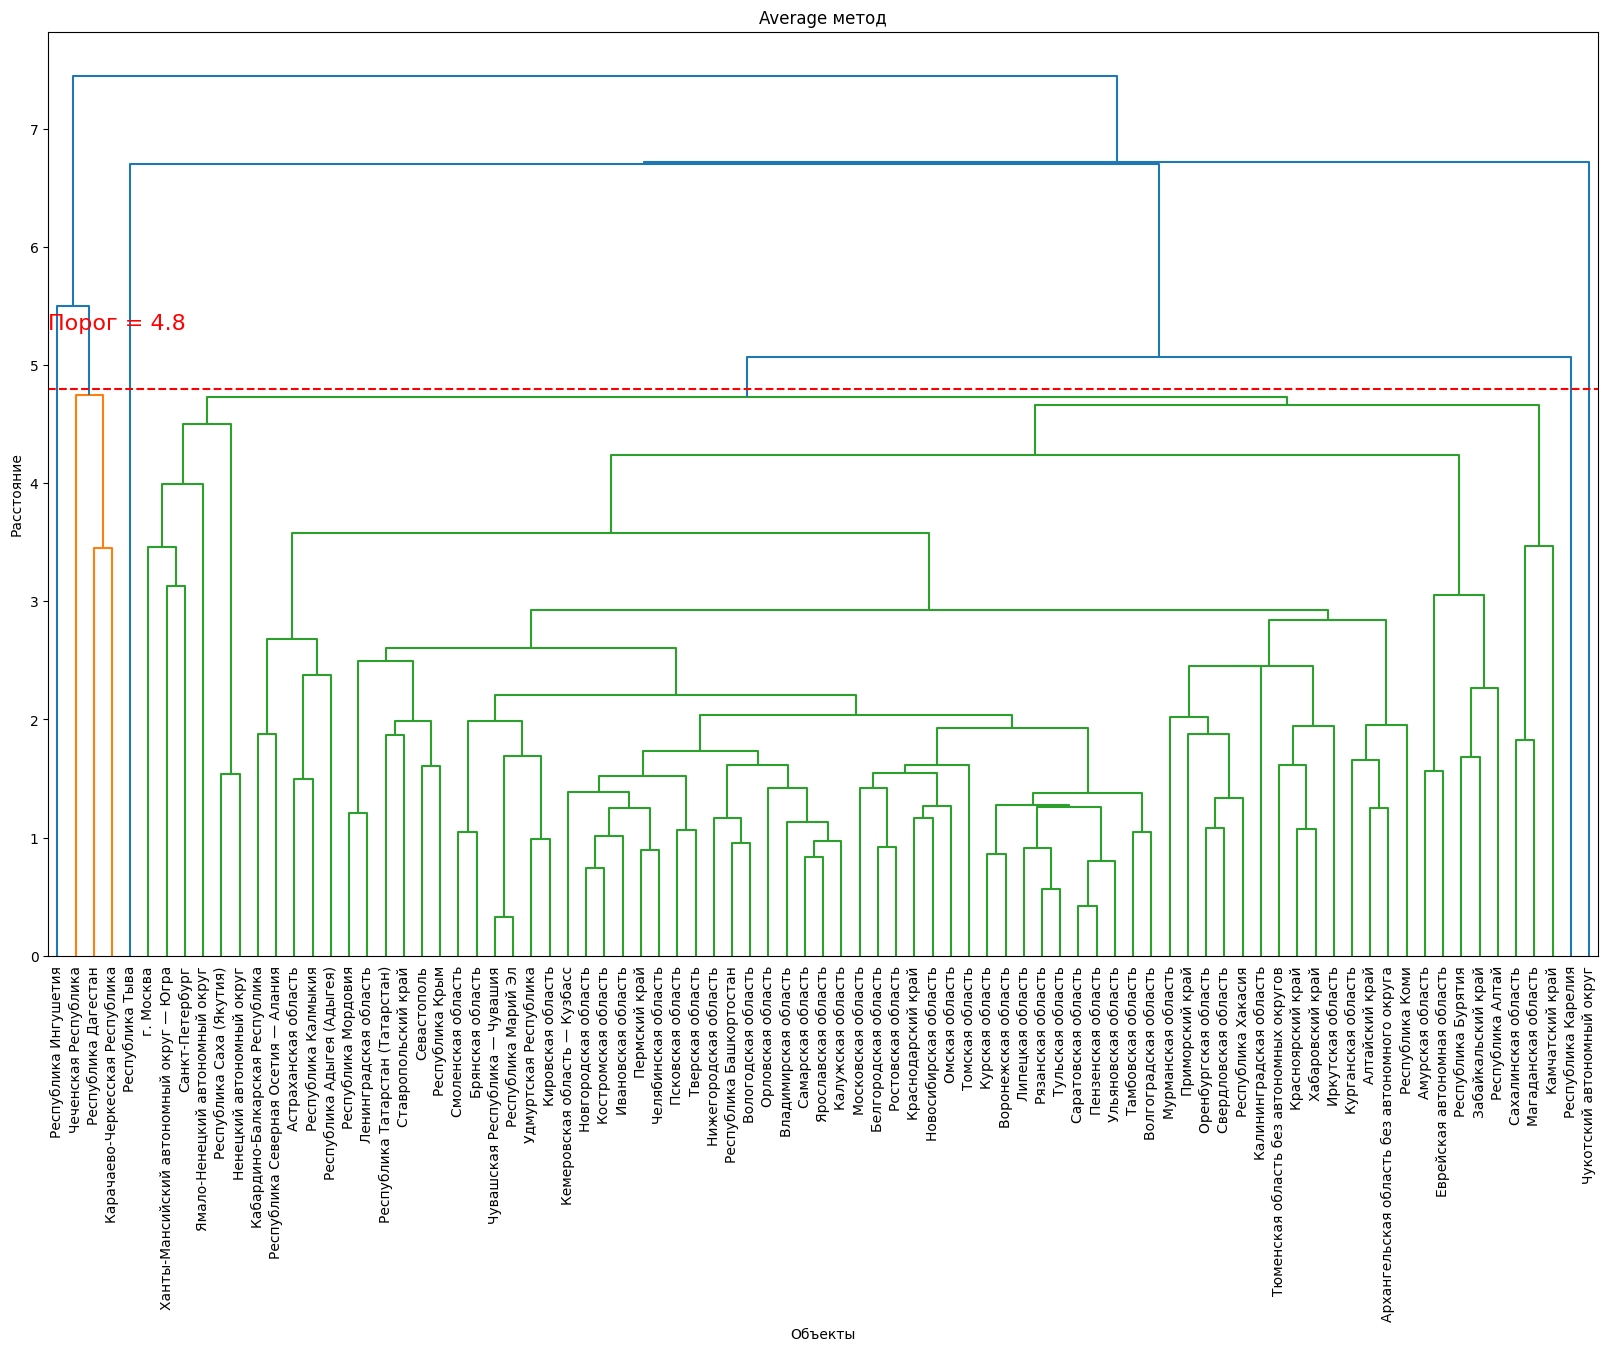

,Кластер,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,Кластер 1,-1.647044,-1.469896,1.576270,2.302244,-0.924205,-2.686982,-0.925301,-2.241196,2.034683
1,Кластер 2,-1.957609,-1.611371,6.282838,2.639061,-1.008564,-3.413594,-1.647059,-3.048129,1.536274
2,Кластер 3,0.130127,-0.010155,-0.157406,-0.173146,0.003716,0.092688,-0.002086,0.091529,-0.073972
3,Кластер 4,1.722111,1.423979,0.312562,-0.350191,0.016254,1.558952,3.439743,1.335481,0.539455
4,Кластер 5,-2.149863,3.048716,2.223050,3.649513,-0.186310,0.361030,-0.871866,0.157795,-1.952592
5,Кластер 6,-2.823425,2.340420,-1.269562,0.660261,3.661357,2.324860,2.017786,1.139200,-0.457364


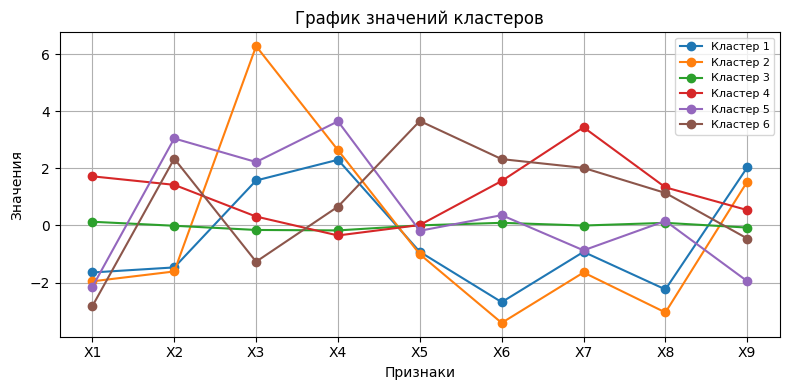

Кластер 1: ['Карачаево-Черкесская Республика', 'Республика Дагестан', 'Чеченская Республика']
Кластер 2: ['Республика Ингушетия']
Кластер 3: ['Алтайский край', 'Амурская область', 'Архангельская область без автономного округа', 'Астраханская область', 'Белгородская область', 'Брянская область', 'Владимирская область', 'Волгоградская область', 'Вологодская область', 'Воронежская область', 'г. Москва', 'Еврейская автономная область', 'Забайкальский край', 'Ивановская область', 'Иркутская область', 'Кабардино-Балкарская Республика', 'Калининградская область', 'Калужская область', 'Камчатский край', 'Кемеровская область — Кузбасс', 'Кировская область', 'Костромская область', 'Краснодарский край', 'Красноярский край', 'Курганская область', 'Курская область', 'Ленинградская область', 'Липецкая область', 'Магаданская область', 'Московская область', 'Мурманская область', 'Ненецкий автономный округ', 'Нижегородская область', 'Новгородская область', 'Новосибирская область', 'Омская область', 'Ор

,X1,X2,X3,X4,X5,X6,X7,X8,X9,complete,average
Наименование региона,,,,,,,,,,,
Алтайский край,0.495986,0.928276,-0.374020,-0.350191,-0.728328,0.352244,1.601546,0.157795,0.165648,2,3
Амурская область,-0.200432,0.972524,-0.374020,0.028729,0.423720,1.226522,0.075644,1.858897,1.785479,2,3
Архангельская область без автономного округа,0.189455,0.655924,-0.015804,-0.476497,0.361036,0.396177,1.408903,0.157795,0.290250,2,3
Астраханская область,-0.361764,-0.377817,0.581224,0.449750,-0.359676,-0.444418,-0.609002,-0.627330,1.037864,3,3
Белгородская область,0.120888,-0.847682,-0.553129,-0.813314,-0.365827,-0.614295,-0.519379,0.223222,-0.706569,3,3
...,...,...,...,...,...,...,...,...,...,...,...
Чеченская Республика,-1.706199,-1.755656,1.655874,4.954679,-0.969619,-3.071645,-2.143682,-2.720994,1.411671,1,1
Чувашская Республика — Чувашия,-1.085070,-0.263463,-0.194912,-0.265986,-0.630555,0.171384,0.095971,-1.150746,-1.329580,3,3
Чукотский автономный округ,-2.823425,2.340420,-1.269562,0.660261,3.661357,2.324860,2.017786,1.139200,-0.457364,4,6


In [11]:
plot_weighted = plot_dendrogram(df, method='average', threshold=4.8)
df_new['average'] = cluster_data(df, n_clusters=6, method='average')
data_mean_weighted = compute_cluster_means(df_new, 'average', ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'])
plot_clusters(data_mean_weighted)
result_weighted = clusters_values(df_new, 'average')

df_new

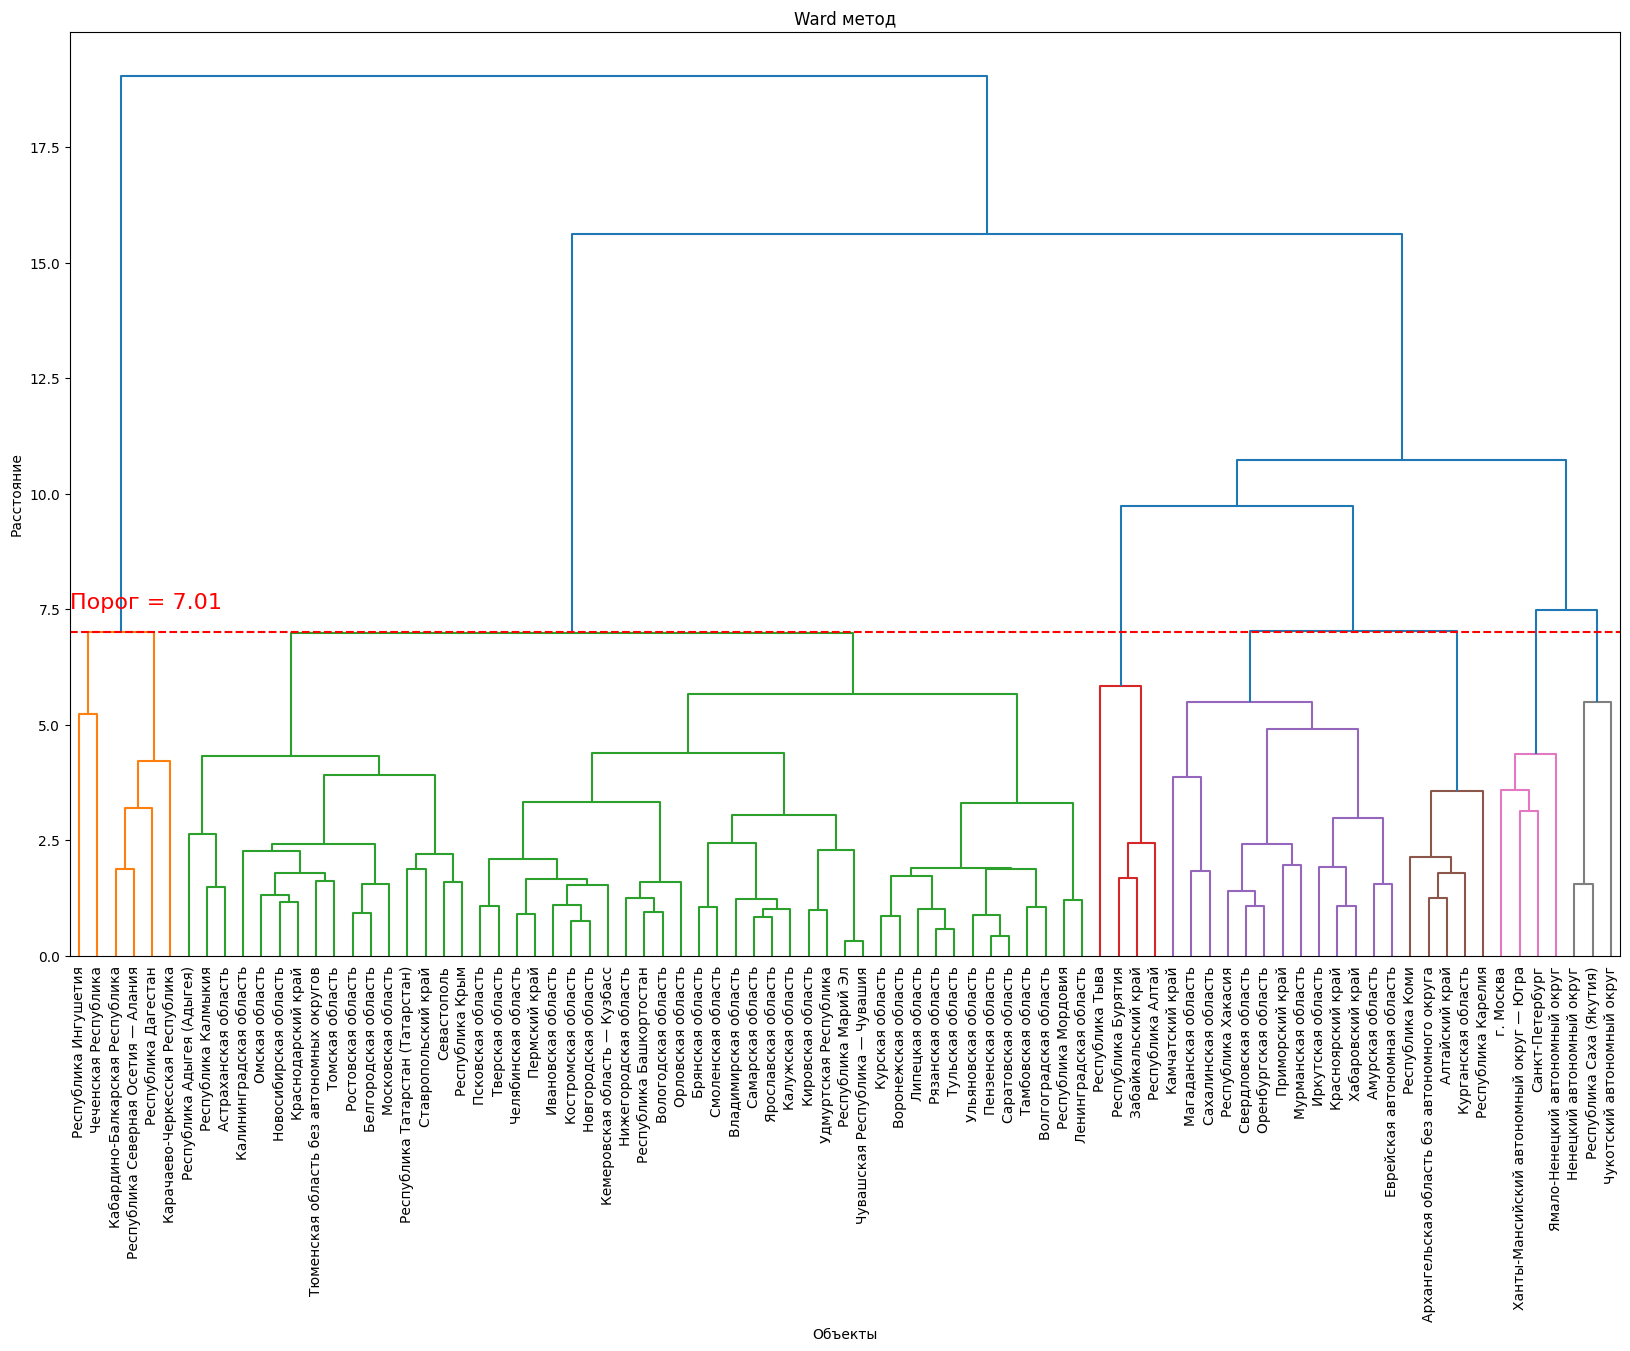

,Кластер,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,Кластер 1,-1.275308,-1.436788,2.327530,1.874206,-0.923000,-2.478176,-1.293340,-2.208483,1.390904
1,Кластер 2,0.058722,-0.312573,-0.291630,-0.489970,-0.405324,0.110009,-0.197216,-0.191586,-0.472316
2,Кластер 3,-1.029276,2.435040,1.700651,1.797018,-0.169675,0.199025,-0.256862,0.599427,0.664057
3,Кластер 4,0.797243,0.456891,-0.330391,0.158274,0.759682,0.692278,-0.039743,1.159331,1.009110
4,Кластер 5,0.801711,1.291661,0.228978,-0.333350,-0.083928,0.775617,1.887693,0.262478,0.414853
5,Кластер 6,-0.018933,-0.763114,-0.956122,0.691837,2.350261,-1.364277,0.942886,0.942919,-0.083557
6,Кластер 7,-1.821373,1.721262,0.262809,0.969010,2.541872,0.383974,1.984985,0.092368,-0.748103


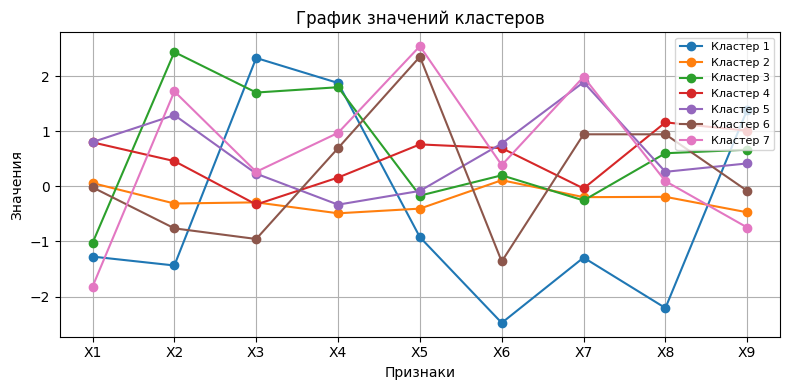

Кластер 1: ['Кабардино-Балкарская Республика', 'Карачаево-Черкесская Республика', 'Республика Дагестан', 'Республика Ингушетия', 'Республика Северная Осетия — Алания', 'Чеченская Республика']
Кластер 2: ['Астраханская область', 'Белгородская область', 'Брянская область', 'Владимирская область', 'Волгоградская область', 'Вологодская область', 'Воронежская область', 'Ивановская область', 'Калининградская область', 'Калужская область', 'Кемеровская область — Кузбасс', 'Кировская область', 'Костромская область', 'Краснодарский край', 'Курская область', 'Ленинградская область', 'Липецкая область', 'Московская область', 'Нижегородская область', 'Новгородская область', 'Новосибирская область', 'Омская область', 'Орловская область', 'Пензенская область', 'Пермский край', 'Псковская область', 'Республика Адыгея (Адыгея)', 'Республика Башкортостан', 'Республика Калмыкия', 'Республика Крым', 'Республика Марий Эл', 'Республика Мордовия', 'Республика Татарстан (Татарстан)', 'Ростовская область', 'Р

,X1,X2,X3,X4,X5,X6,X7,X8,X9,complete,average,ward
Наименование региона,,,,,,,,,,,,
Алтайский край,0.495986,0.928276,-0.374020,-0.350191,-0.728328,0.352244,1.601546,0.157795,0.165648,2,3,5
Амурская область,-0.200432,0.972524,-0.374020,0.028729,0.423720,1.226522,0.075644,1.858897,1.785479,2,3,4
Архангельская область без автономного округа,0.189455,0.655924,-0.015804,-0.476497,0.361036,0.396177,1.408903,0.157795,0.290250,2,3,5
Астраханская область,-0.361764,-0.377817,0.581224,0.449750,-0.359676,-0.444418,-0.609002,-0.627330,1.037864,3,3,2
Белгородская область,0.120888,-0.847682,-0.553129,-0.813314,-0.365827,-0.614295,-0.519379,0.223222,-0.706569,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
Чеченская Республика,-1.706199,-1.755656,1.655874,4.954679,-0.969619,-3.071645,-2.143682,-2.720994,1.411671,1,1,1
Чувашская Республика — Чувашия,-1.085070,-0.263463,-0.194912,-0.265986,-0.630555,0.171384,0.095971,-1.150746,-1.329580,3,3,2
Чукотский автономный округ,-2.823425,2.340420,-1.269562,0.660261,3.661357,2.324860,2.017786,1.139200,-0.457364,4,6,7


In [12]:
plot_ward = plot_dendrogram(df, method='ward', threshold=7.01)
df_new['ward'] = cluster_data(df, n_clusters=7, method='ward')
data_mean_weighted = compute_cluster_means(df_new, 'ward', ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'])
plot_clusters(data_mean_weighted)
result_ward = clusters_values(df_new, 'ward')
df_new

,Кластер,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,Кластер 1,-0.180553,-0.482676,-0.148003,-0.043447,-0.140261,-0.414972,-0.534723,0.255935,0.121147
1,Кластер 2,-0.731484,1.635939,0.611075,0.870771,1.013879,0.611677,0.382573,0.746638,0.539455
2,Кластер 3,1.172079,0.377086,-0.266906,-0.241221,-0.021442,0.645565,0.712626,0.488778,0.348887
3,Кластер 4,-1.831904,-1.683514,3.969356,3.796870,-0.989091,-3.242620,-1.895370,-2.884562,1.473973
4,Кластер 5,-0.005185,-0.298291,-0.370168,-0.665278,-0.474687,0.232560,-0.181079,-0.390948,-0.730685
5,Кластер 6,-0.997010,-1.313425,1.506617,0.912873,-0.889954,-2.095954,-0.992326,-1.870443,1.349370
6,Кластер 7,-0.018933,-0.763114,-0.956122,0.691837,2.350261,-1.364277,0.942886,0.942919,-0.083557


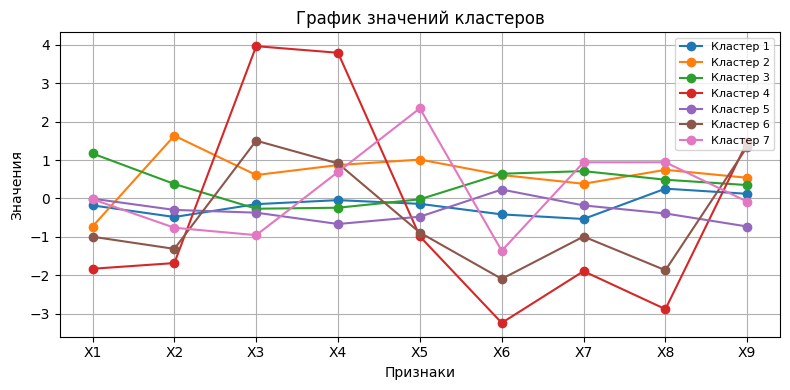

Кластер 0: ['Астраханская область', 'Калининградская область', 'Краснодарский край', 'Красноярский край', 'Московская область', 'Новосибирская область', 'Омская область', 'Республика Калмыкия', 'Ростовская область', 'Севастополь', 'Ставропольский край', 'Томская область', 'Тюменская область без автономных округов', 'Хабаровский край']
Кластер 1: ['Амурская область', 'Еврейская автономная область', 'Забайкальский край', 'Иркутская область', 'Магаданская область', 'Ненецкий автономный округ', 'Республика Алтай', 'Республика Бурятия', 'Республика Коми', 'Республика Саха (Якутия)', 'Республика Тыва', 'Сахалинская область', 'Чукотский автономный округ']
Кластер 2: ['Алтайский край', 'Архангельская область без автономного округа', 'Вологодская область', 'Камчатский край', 'Курганская область', 'Мурманская область', 'Нижегородская область', 'Новгородская область', 'Оренбургская область', 'Пермский край', 'Приморский край', 'Псковская область', 'Республика Карелия', 'Республика Хакасия', 'Свер

,X1,X2,X3,X4,X5,X6,X7,X8,X9,complete,average,ward,k-means
Наименование региона,,,,,,,,,,,,,
Алтайский край,0.495986,0.928276,-0.374020,-0.350191,-0.728328,0.352244,1.601546,0.157795,0.165648,2,3,5,2
Амурская область,-0.200432,0.972524,-0.374020,0.028729,0.423720,1.226522,0.075644,1.858897,1.785479,2,3,4,1
Архангельская область без автономного округа,0.189455,0.655924,-0.015804,-0.476497,0.361036,0.396177,1.408903,0.157795,0.290250,2,3,5,2
Астраханская область,-0.361764,-0.377817,0.581224,0.449750,-0.359676,-0.444418,-0.609002,-0.627330,1.037864,3,3,2,0
Белгородская область,0.120888,-0.847682,-0.553129,-0.813314,-0.365827,-0.614295,-0.519379,0.223222,-0.706569,3,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Чеченская Республика,-1.706199,-1.755656,1.655874,4.954679,-0.969619,-3.071645,-2.143682,-2.720994,1.411671,1,1,1,3
Чувашская Республика — Чувашия,-1.085070,-0.263463,-0.194912,-0.265986,-0.630555,0.171384,0.095971,-1.150746,-1.329580,3,3,2,4
Чукотский автономный округ,-2.823425,2.340420,-1.269562,0.660261,3.661357,2.324860,2.017786,1.139200,-0.457364,4,6,7,1


In [13]:
df_new['k-means'] = cluster_data(df, n_clusters=7, method='k-means')
data_mean_k_means = compute_cluster_means(df_new, 'k-means', ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'])
plot_clusters(data_mean_k_means)
result_k_means = clusters_values(df_new, 'k-means')
df_new

In [14]:
def function(df, method):

    mean_values = df.groupby(method).mean().add_suffix('_mean')
    mean_values
    df_new = df.merge(mean_values, left_on=method, right_index=True, )
    df_new.loc[:, 'X1':'X9'] = (df_new.loc[:, 'X1':'X9'].values - df_new.loc[:, 'X1_mean':'X9_mean'].values) ** 2
    df_new['L_2'] = (df_new.loc[:, 'X1':'X9'].sum(axis=1))
    df_new.groupby(method).sum('L_2')
    table_function = pd.DataFrame(df_new.groupby(method).sum('L_2')['L_2'])
    sum_function = df_new.groupby(method).sum('L_2')['L_2'].sum()
    
    print(f'Функционал качсетва {method}: {sum_function}')

In [15]:
function(df_new, 'complete')
function(df_new, 'average')
function(df_new, 'ward')
function(df_new, 'k-means')


Функционал качсетва complete: 366.2920811489777
Функционал качсетва average: 487.116055432332
Функционал качсетва ward: 303.738842759019
Функционал качсетва k-means: 326.28528255079533
